## Pressure and entrainment time series 

Additional analysis of pressure and entrainment timeseries to address Reviewer 2's comment 7 to the paper: Burgos-Cuevas et al. (2022) Experimental downslope gravity currents over a synthetic topography.

Comment:

*7) Once you have time series of ´Entrainment E (fig 4) and Pressure P (fig 6), try to characterize those series: standard deviation and typical length of peaks calculable from autocorrelation function. Then You can compare flat and topographic surface more effectively.*

The thing is, we don't have pressure timeseries for the smooth bottom experiments, so we can't compare to the experiment with rough topography; but we can compare entrainment.





In [6]:
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import numpy as np
import pandas as pd
from scipy import signal
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf 
#From https://www.alpharithms.com/autocorrelation-time-series-python-432909/

### Pressure

Time series of pressure at each station (6 stations), experiment TL01 (figure 7 of R1 manuscript). TL01 is the lowest section of the topographic slope.

St. 1: mean p=0.097, std p=0.765
St. 2: mean p=0.230, std p=1.936
St. 3: mean p=0.425, std p=2.283
St. 4: mean p=0.375, std p=1.937
St. 5: mean p=0.065, std p=1.250
St. 6: mean p=0.071, std p=1.135


Text(0, 0.5, 'pressure + offset')

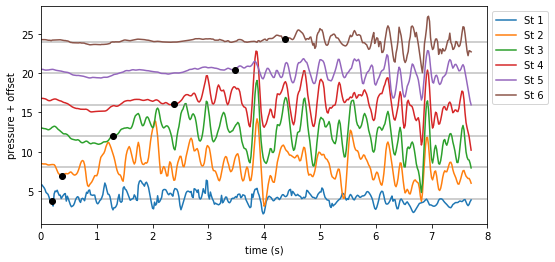

In [2]:
fig,ax = plt.subplots(1,1,figsize=(8,4))
inds = [10,20,70,130,190,240]
for st, ind in zip(range(1,7), inds):
    filename = ('GCer07_Pres%d_c1.txt' %st)
    df = pd.read_csv(filename, sep='\t', names=['time','pressure'])
    pres = df.pressure
    time = df.time
    offset = (st*4)
    ax.axhline(offset,color='0.5', alpha=0.5)
    ax.plot(time, pres+offset, label='St %d' %st)
    ax.plot(time[ind], pres[ind]+offset,'ko')
    print('St. %d: mean p=%1.3f, std p=%1.3f' %(st,np.nanmean(pres[ind:]), np.nanstd(pres[ind:])))
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlim(0,8)
ax.set_xlabel('time (s)')
ax.set_ylabel('pressure + offset')

Largest variability at st 3, followed by st 2 and st 4. Mean pressure also largest at st 3, 2 and 4. Mean and std p calculated only after arrival of the GC (black dots indicate the beginning of the interval considered to calulate mean and std).

In [3]:
samp_freq = 1/(df.time[5]-df.time[4])

What are those peaks that line up at 4 s and 7 s?

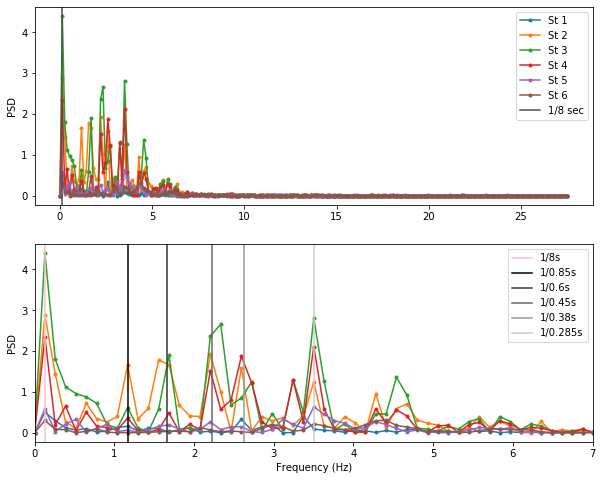

In [4]:
fig,(ax,ax2) = plt.subplots(2,1,figsize=(10,8))

for st in range(1,7):
    filename = ('GCer07_Pres%d_c1.txt' %st)
    df = pd.read_csv(filename, sep='\t', names=['time','pressure'])
    freq, psd = signal.periodogram(df.pressure, samp_freq, detrend='constant')
    ax.plot(freq[:], psd[:],'.-', label='St %d' %st)
    ax2.plot(freq[:], psd[:],'.-')
ax.axvline(1/np.nanmax(df.time), color='0.3', label='1/8 sec') # plot timeseries length in freq
ax2.axvline(1/np.nanmax(df.time), color='pink', label='1/8s') # plot timeseries length in freq

ax2.axvline(1/0.85, color='0', label='1/0.85s') # 
ax2.axvline(1/0.6, color='0.2', label='1/0.6s') # 
ax2.axvline(1/0.45, color='0.4', label='1/0.45s') # 
ax2.axvline(1/0.38, color='0.6', label='1/0.38s') # 
ax2.axvline(1/0.285, color='0.8', label='1/0.285s') # 

ax.legend()
ax2.set_xlabel('Frequency (Hz)')
ax.set_ylabel('PSD')
ax2.set_ylabel('PSD')
ax2.set_xlim(0,7)
ax2.legend()

* Ignore large peak at freq = 1/8 sec. That correponds to the length of the timeseries (8 sec) so it means nothing.
* More energy (taller peaks) at stations 2, 3 and 4 (evident also from time series plots, larger amplitudes).
* Stations 2, 3, and 4 are in the "flatter" region of the lower slope.
* It would be nice If we had pressure timeseries for the smooth case.

#### Autocorrelations for Pressure

Text(17.200000000000003, 0.5, 'pressure + offset')

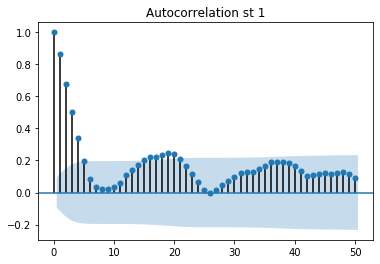

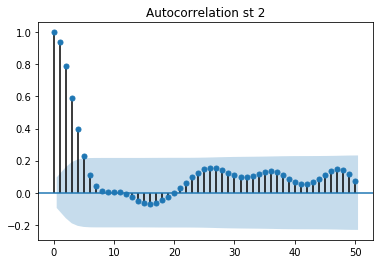

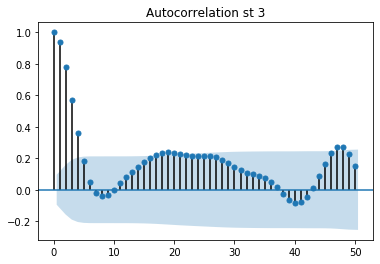

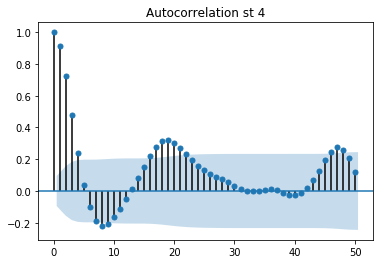

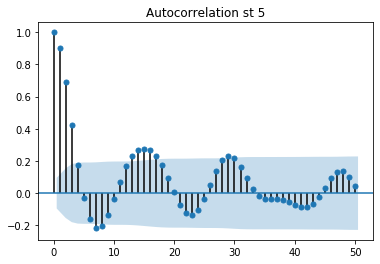

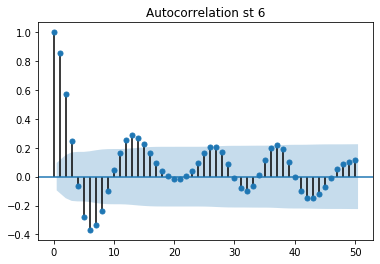

In [7]:
for st, ind in zip(range(1,7), inds):
    filename = ('GCer07_Pres%d_c1.txt' %st)
    df = pd.read_csv(filename, sep='\t', names=['time','pressure'])
    pres = df.pressure
    time = df.time
    
    plot_acf(pres, lags=50, missing='drop', 
              title='Autocorrelation st %d' %st)

ax.set_xlim(0,8)
ax.set_xlabel('time (s)')
ax.set_ylabel('pressure + offset')

### Entrainment

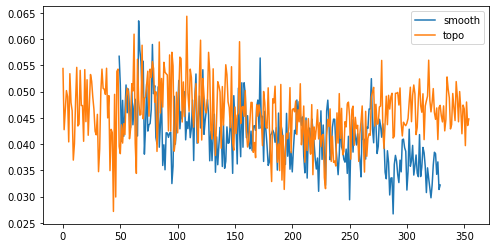

In [44]:
fig,ax = plt.subplots(1,1,figsize=(8,4))

filename_liso = ('EntrainmentGCe29liso_exp.dat')
df_liso = pd.read_csv(filename_liso, sep='\t', names=['E'], na_values='NaN')

filename_topo = ('EntrainmentGCer07_exp.dat')
df_topo = pd.read_csv(filename_topo, sep='\t', names=['E'], na_values='NaN')

ax.plot(df_liso.E, label='smooth')
ax.plot(df_topo.E, label='topo')
ax.legend()

In [9]:
mean_liso = df_liso.E.mean()
mean_topo = df_topo.E.mean()

print(mean_liso, mean_topo)

0.041521081850533825 0.045871307042253534


In [10]:
std_liso = df_liso.E.std()
std_topo = df_topo.E.std()

print(std_liso, std_topo)

0.005784230511583516 0.005669189365405424


EntrainmentGCer07_exp.dat: mean E=4.587e-02, std E=5.661e-03
EntrainmentGCer24_exp.dat: mean E=4.579e-02, std E=7.219e-03
EntrainmentGCer25_exp.dat: mean E=4.854e-02, std E=8.139e-03
EntrainmentGCer28_exp.dat: mean E=4.431e-02, std E=6.348e-03
EntrainmentGCer29_exp.dat: mean E=4.508e-02, std E=6.997e-03
EntrainmentGCer30_exp.dat: mean E=4.409e-02, std E=5.769e-03
EntrainmentGCer31_exp.dat: mean E=4.576e-02, std E=5.560e-03
EntrainmentGCer34_exp.dat: mean E=4.325e-02, std E=4.950e-03


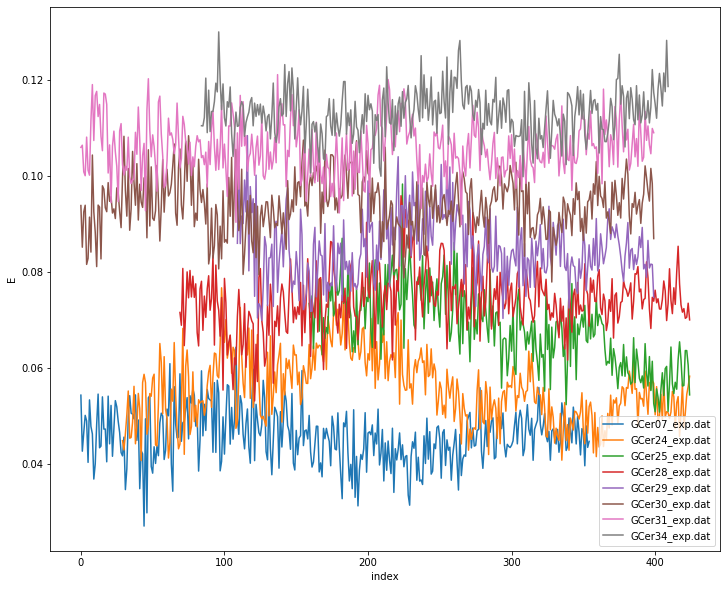

In [11]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
exps = ['07','24','25','28','29','30','31','34']

for exp, ii in zip(exps, range(len(exps))):
    filename = ('EntrainmentGCer%s_exp.dat' %exp)
    df = pd.read_csv(filename, sep='\t', names=['E'], na_values='NaN')
    offset = (ii*0.01)
    ax.plot(df.E+offset, label=filename[11:])
    print('%s: mean E=%1.3e, std E=%1.3e' %(filename,np.nanmean(df.E), np.nanstd(df.E)))
ax.set_ylabel('E')
ax.set_xlabel('index')
ax.legend()

EntrainmentGCe24_exp.dat: mean E=4.588e-02, std E=7.322e-03
EntrainmentGCe25_exp.dat: mean E=4.951e-02, std E=8.445e-03
EntrainmentGCe28_exp.dat: mean E=4.433e-02, std E=6.417e-03
EntrainmentGCe29liso_exp.dat: mean E=4.152e-02, std E=5.774e-03
EntrainmentGCe31_exp.dat: mean E=4.598e-02, std E=5.533e-03
EntrainmentGCe34_exp.dat: mean E=4.298e-02, std E=4.954e-03


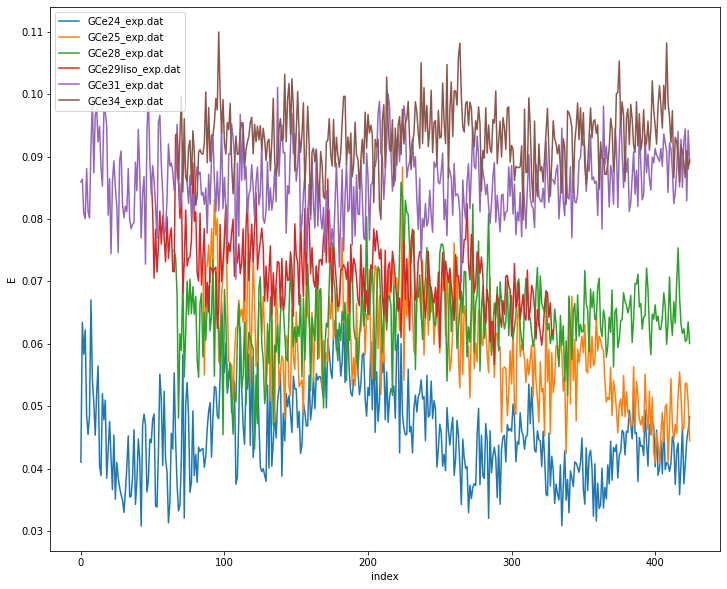

In [12]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
exps = ['24','25','28','29liso','31','34']

for exp, ii in zip(exps, range(len(exps))):
    filename = ('EntrainmentGCe%s_exp.dat' %exp)
    df = pd.read_csv(filename, sep='\t', names=['E'], na_values='NaN')
    offset = (ii*0.01)
    ax.plot(df.E+offset, label=filename[11:])
    print('%s: mean E=%1.3e, std E=%1.3e' %(filename,np.nanmean(df.E), np.nanstd(df.E)))
ax.set_ylabel('E')
ax.set_xlabel('index')
ax.legend()

Mean and std values for liso and topo are:

    EntrainmentGCer07_exp.dat: mean E=4.587e-02, std E=5.661e-03

    EntrainmentGCe29liso_exp.dat: mean E=4.152e-02, std E=5.774e-03    
    
But I really don't know how much can be concluded from these. Is it fair to say that there is more entrainment but less variability for the rough topo experiment? 

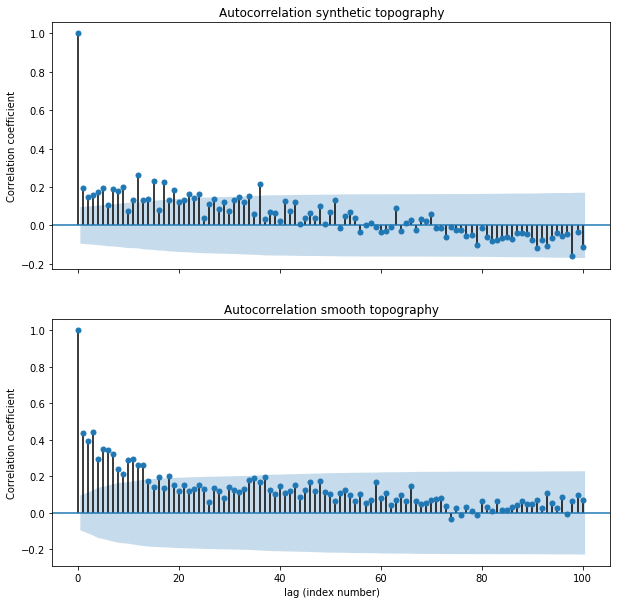

In [13]:
fig, (ax,ax2) = plt.subplots(2,1,figsize=(10,10), sharex=True)
# Use the Autocorrelation function from the statsmodel library passing our
# DataFrame object in as the data
plot_acf(df_topo.E,ax=ax, lags=100, missing='drop', 
              title='Autocorrelation synthetic topography')
plot_acf(df_liso.E,ax=ax2, lags=100, missing='drop', 
               title='Autocorrelation smooth topography')
ax.set_ylabel('Correlation coefficient')
ax2.set_ylabel('Correlation coefficient')
ax2.set_xlabel('lag (index number)')

plt.show()

**How to read these plots**

The y-axis shows the correlalation coefficient between the original timeseries and the same timeseries "moved" by a particular lag value (dots). Lag index is equivalent to a time lag of ind*dt where dt is approx 1/55 Hz (0.18 sec).  Positive values mean positive correlation and negative values mean negative correlation. Of course, there is 100% positive correlation when the lag=0 (r=1), since we are just comparing the time series to itself. The shaded area is the confidence interval with a default value of α = 0.05 (95% confidence interval). Anything within this range represents a value that has no significant correlation with the most recent value of E.

**Interpretation**

Autocorrelation plots show a positive correlation between the value of entrainment and up to 24 values earlier for synthetic topo and 13 for smooth topo. Autocorrelation decreases as lag increases for flat topo, fast between 0 and 20, slower afterwards, although correlations are not significant. Correlation remain positive for all lag values between 0 and 100.

Autocorrelation also generally decreases with increasing lag for the synthetic topo experiment, but only after lag=12. Correlations become mostly negative after lag 57. 

The fact that autocrr decreases for the smooth case just means that E has a linear trend and decreases in time (which you can see form the time series). This is not the case for the rough topo case. (Should I remove that trend and redo?)

**Longer lags**

For longer lags, correlations for F01 become negative, but still not significant, while correlations for TL02 oscillate around 0, also not significant (see plot below)

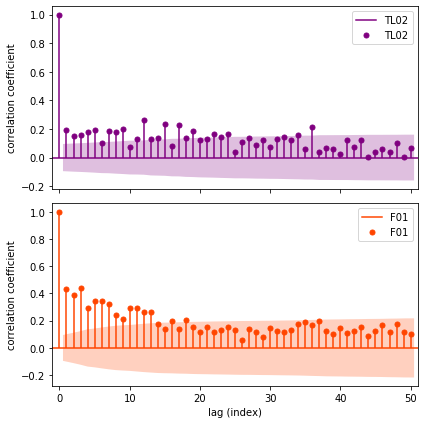

In [43]:
fig, (ax,ax1) = plt.subplots(2,1,figsize=(6,6), sharex=True)

plot_acf(df_topo.E,ax=ax,lags=50, missing='drop',  label='TL02',color='purple', title='',
         vlines_kwargs={'colors':'purple'} )
for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('purple')

plot_acf(df_liso.E,ax=ax1,lags=50, missing='drop', color='orangered', 
         vlines_kwargs={'colors':'orangered'},title='', 
         label='F01')
for item in ax1.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('orangered')
ax.set_ylabel('correlation coefficient')

ax1.set_xlabel('lag (index)')
ax1.set_ylabel('correlation coefficient')
ax.set_xlim(-1,51)
ax.legend()
ax1.legend()
plt.tight_layout()
plt.show()

Rule of thumb from DATA ANALYSISMETHODS IN PHYSICAL OCEANOGRAPHY, Thomson & Emery: In many cases, low-frequency components in geophysical time series make it pointless to push the lag times much beyond 10-20% of the data series. 10% is about 42 lags.

### Autocorrelation plots for all runs

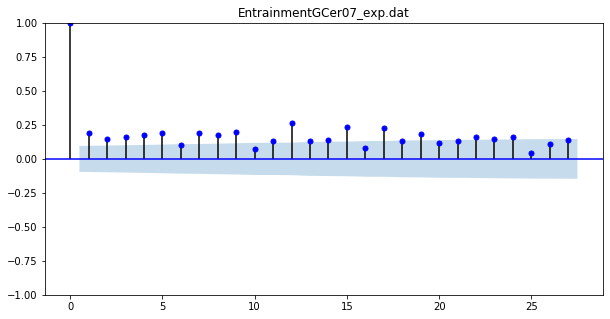

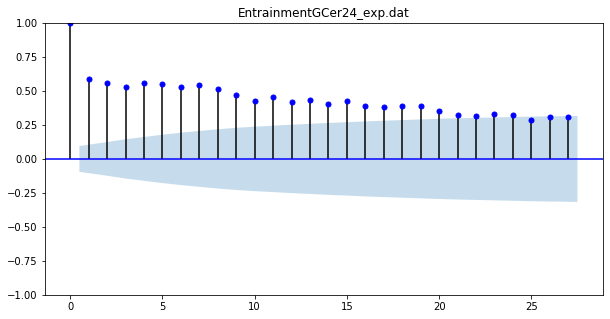

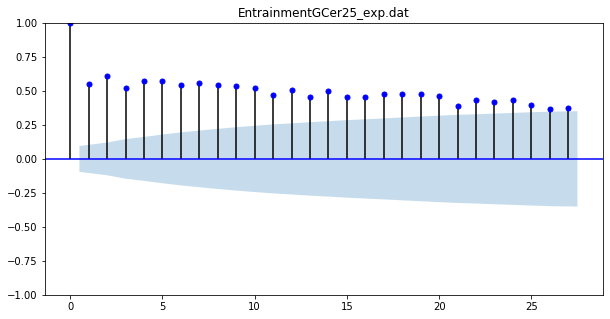

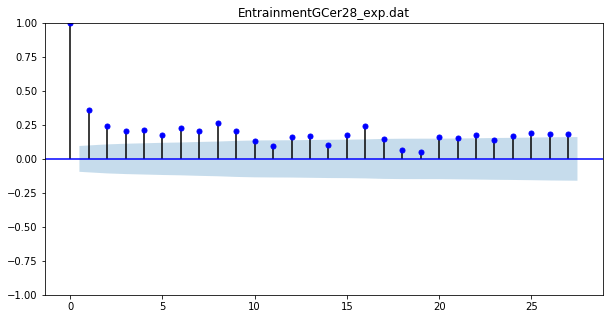

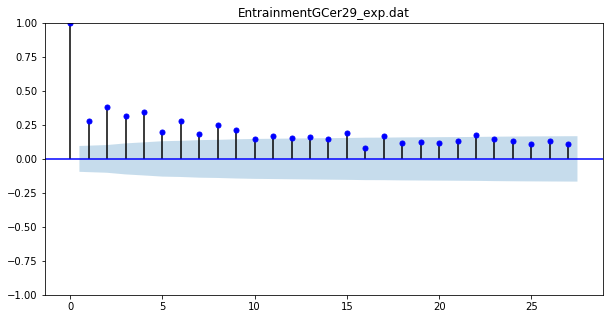

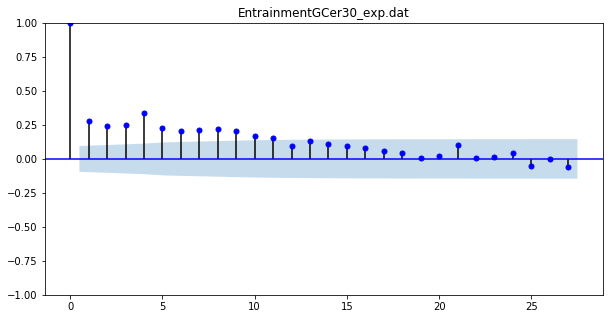

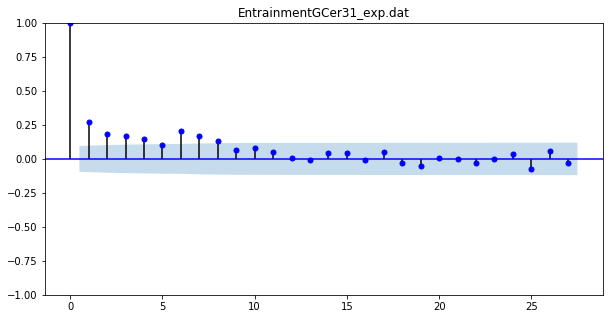

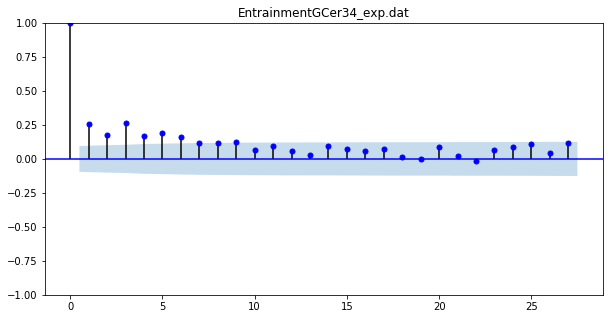

In [19]:
exps = ['07','24','25','28','29','30','31','34']

for exp, ii in zip(exps, range(len(exps))):
    
    filename = ('EntrainmentGCer%s_exp.dat' %exp)
    df = pd.read_csv(filename, sep='\t', names=['E'], na_values='NaN')
    
    fig, (ax) = plt.subplots(1,1,figsize=(10,5), sharex=True)
    plot_acf(df.E, ax=ax, missing='drop',title=filename,color='blue')
    plt.ylim(-1,1)
    plt.show()

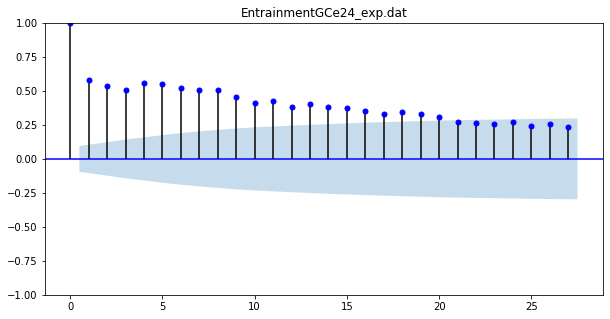

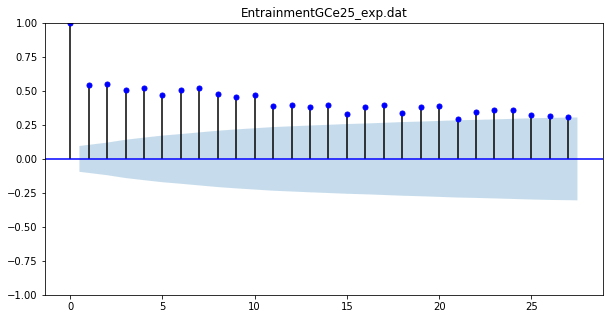

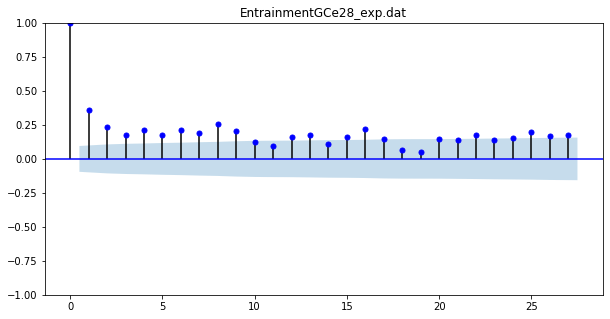

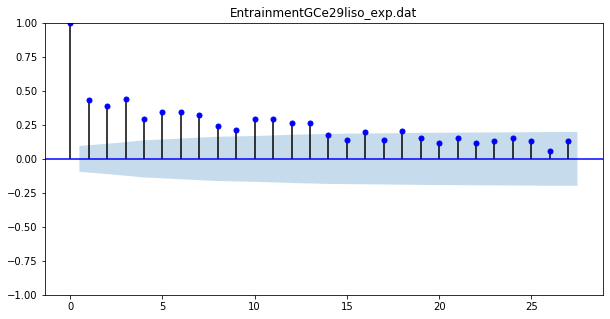

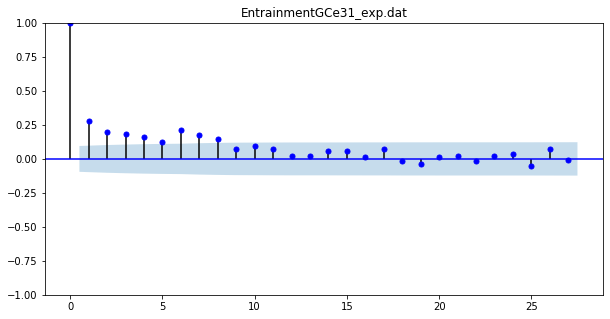

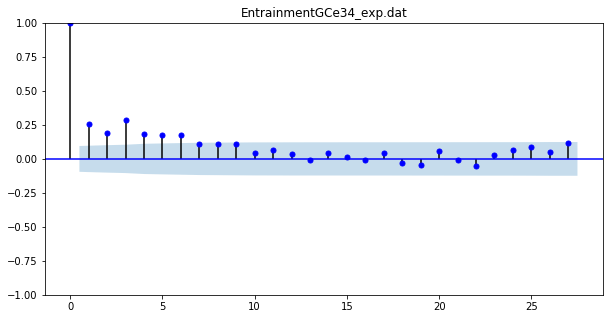

In [20]:
exps = ['24','25','28','29liso','31','34']

for exp, ii in zip(exps, range(len(exps))):
    
    filename = ('EntrainmentGCe%s_exp.dat' %exp)
    df = pd.read_csv(filename, sep='\t', names=['E'], na_values='NaN')
    
    fig, (ax) = plt.subplots(1,1,figsize=(10,5), sharex=True)
    plot_acf(df.E, ax=ax, missing='drop',title=filename,color='blue')
    plt.ylim(-1,1)
    plt.show()

### Frequency spectra for entrainment time series

Rough vs smooth topo:

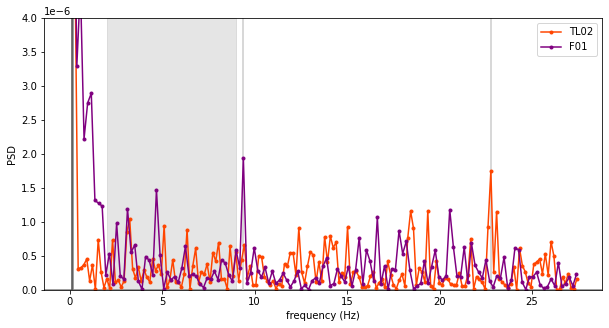

In [178]:
#samp_freq = 55 #(8/np.shape(df.E)[0]) 
dt = 1/55 #(s)
    
filename_liso = ('EntrainmentGCe29liso_exp_noNaN.dat')
df_liso = pd.read_csv(filename_liso, sep='\t', names=['E'], na_values='NaN')
entr_liso = np.array(df_liso.E[:])
signalFFT_liso = np.fft.rfft(entr_liso)

filename_topo = ('EntrainmentGCer07_exp_noNaN.dat')
df_topo = pd.read_csv(filename_topo, sep='\t', names=['E'], na_values='NaN')
entr_topo = np.array(df_topo.E[:])
signalFFT_topo = np.fft.rfft(entr_topo)

## Get Power Spectral Density
signalPSD_liso = np.abs(signalFFT_liso) ** 2
signalPSD_liso /= len(signalFFT_liso)**2

signalPSD_topo = np.abs(signalFFT_topo) ** 2
signalPSD_topo /= len(signalFFT_topo)**2

## Get frequencies corresponding to signal 
fftFreq_liso = np.fft.rfftfreq(len(entr_liso), dt)
fftFreq_topo = np.fft.rfftfreq(len(entr_topo), dt)


fig, (ax) = plt.subplots(1,1,figsize=(10,5), sharex=True)

ax.axhline(0, color='0.5')
ax.axvline(1/(len(entr_liso)*dt), color='0.5')
ax.axvline(1/(len(entr_topo)*dt), color='0.3')
ax.axvline(9.4, color='0.8')
ax.axvline(22.8, color='0.8')
ax.axvspan(2, 9, alpha=0.2, color='gray')

ax.plot(fftFreq_topo[:], signalPSD_topo[:],'.-', color='orangered', label='TL02')
ax.plot(fftFreq_liso[:], signalPSD_liso[:],'.-',color='purple', label='F01')
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('PSD')
ax.set_ylim(0,4E-6,)
ax.legend()
plt.show()

* Mmm... I guess you could say that energy in the lower frequencies, say between 2 and 9 Hz, is distributed simalrly for both cases. Largest peak for smooth topo not matched by TL02 (9.4 Hz). Higer frequencies do not look similar.
* Largest peak for TL02 is at 28 Hz.
* Maybe you could say that energy is distributed among less frequencies in the smooth case? (less peaks for smooth than for topo)
* But, I don't see any pattern or consistency when comparing spectra of experiments with realistic topo (plots below, peaks look very random)

All runs:

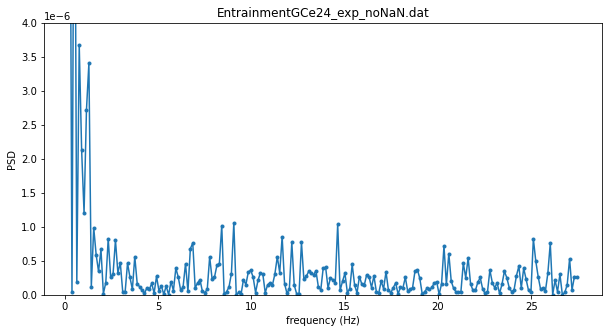

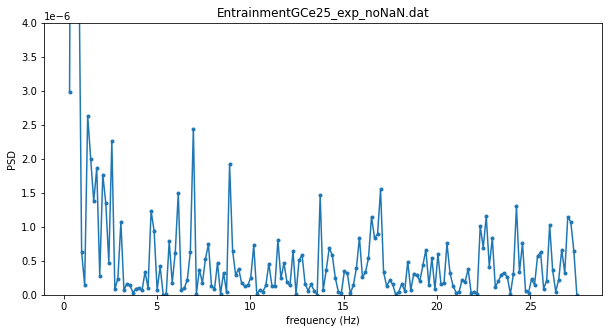

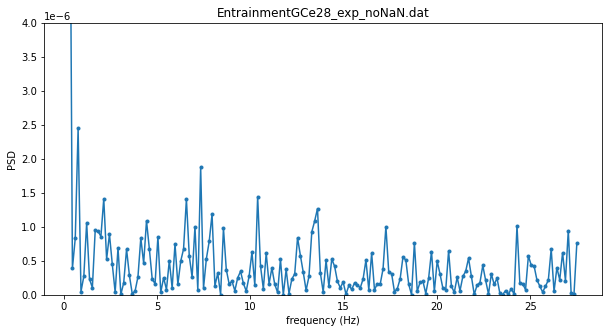

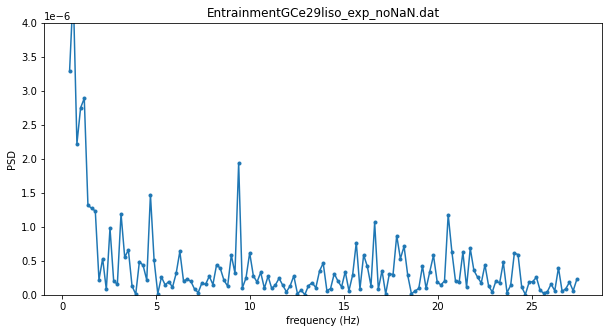

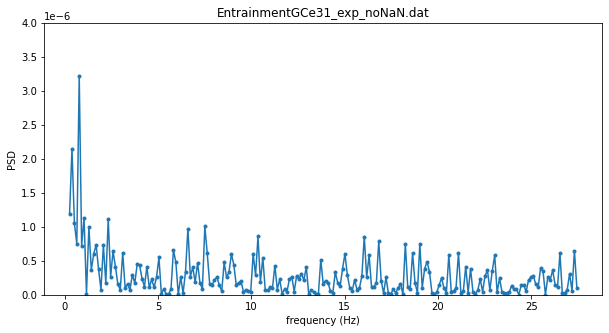

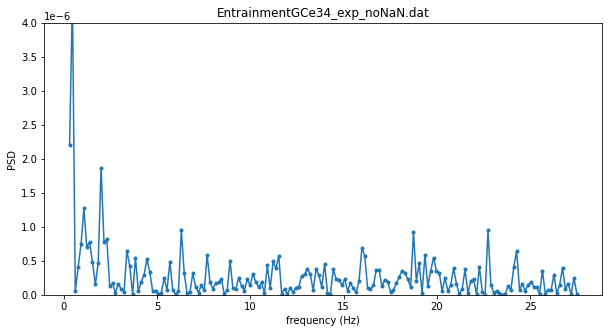

In [179]:
exps = ['24','25','28','29liso','31','34']

#samp_freq = 55 #(8/np.shape(df.E)[0]) 
dt = 1/55 #(s)
for exp, ii in zip(exps, range(len(exps))):
    
    filename = ('EntrainmentGCe%s_exp_noNaN.dat' %exp)
    df = pd.read_csv(filename, sep='\t', names=['E'], na_values='NaN')
    entr = np.array(df.E[:])
    signalFFT = np.fft.rfft(entr)

    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    signalPSD /= len(signalFFT)**2

    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(entr), dt)
    
    fig, (ax) = plt.subplots(1,1,figsize=(10,5), sharex=True)
    ax.plot(fftFreq[2:], signalPSD[2:],'.-')
    ax.set_title(filename)
    ax.set_xlabel('frequency (Hz)')
    ax.set_ylabel('PSD')
    ax.set_ylim(0,4E-6,)

    plt.show()

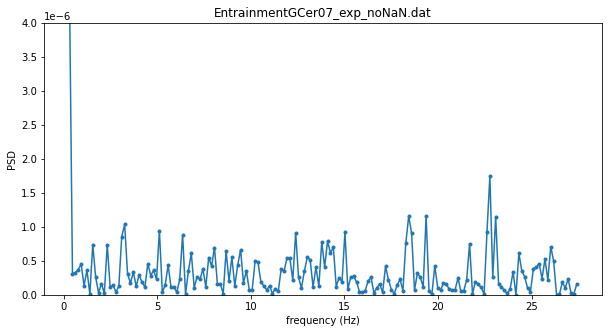

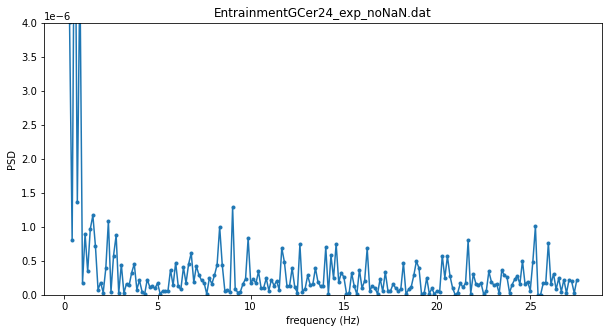

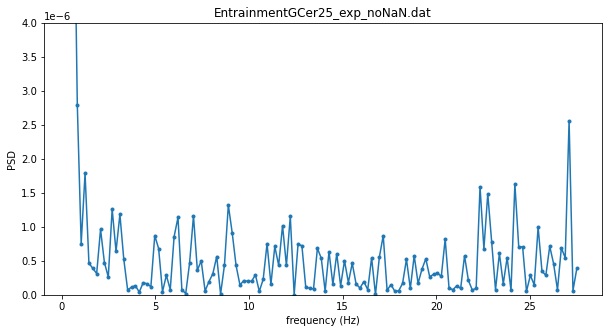

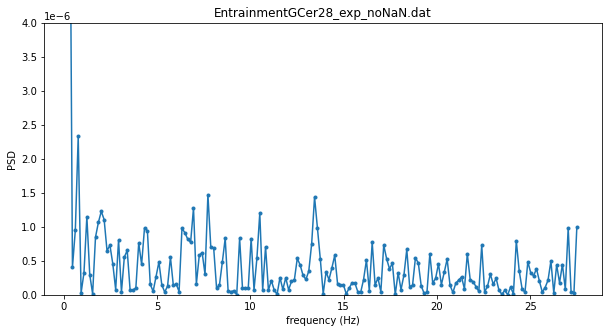

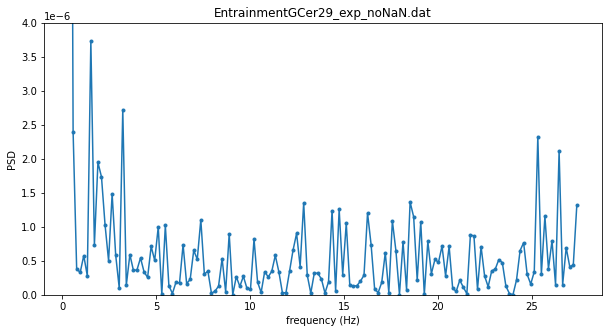

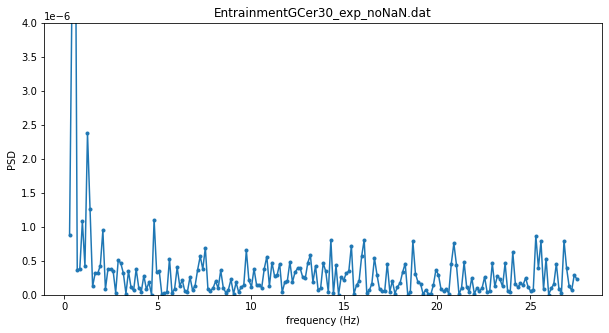

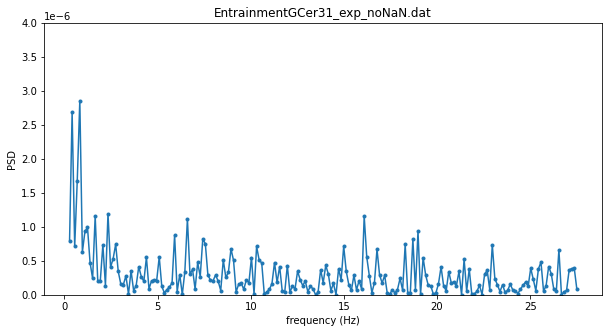

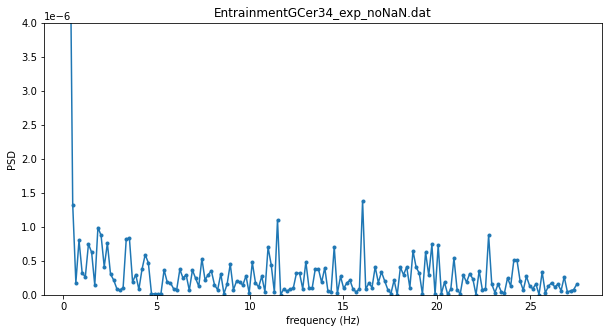

In [180]:
exps = ['07','24','25','28','29','30','31','34']
#samp_freq = 55 #(8/np.shape(df.E)[0]) 
dt = 1/55 #(s)
for exp, ii in zip(exps, range(len(exps))):
    
    filename = ('EntrainmentGCer%s_exp_noNaN.dat' %exp)
    df = pd.read_csv(filename, sep='\t', names=['E'], na_values='NaN')
    #mask = np.ma.getmask(np.ma.masked_where('NaN',np.array(df.E[:])))
    entr = np.ma.masked_invalid(np.array(df.E[:]))
    
    signalFFT = np.fft.rfft(entr.data)

    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    signalPSD /= len(signalFFT)**2

    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(entr), dt)
    
    fig, (ax) = plt.subplots(1,1,figsize=(10,5), sharex=True)
    ax.plot(fftFreq[2:], signalPSD[2:],'.-')
    ax.set_title(filename)
    ax.set_xlabel('frequency (Hz)')
    ax.set_ylabel('PSD')
    ax.set_ylim(0,4E-6,)

    plt.show()